In [1]:
import pandas as pd
df = pd.read_csv("merged_dataset.csv")
df


,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [2]:
missing_values = df.isnull().sum()
missing_values

Text        0
Language    0
dtype: int64

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset
dataset = pd.read_csv('merged_dataset.csv')

# Deduplicate the dataset and make an explicit copy to avoid warnings
dataset_deduplicated = dataset.drop_duplicates(subset=['Text'], keep='first').copy()

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase and remove extra whitespaces
        text = text.strip().lower()
        text = re.sub(r'\s+', ' ', text)
    return text

# Apply text cleaning
dataset_deduplicated.loc[:, 'Text'] = dataset_deduplicated['Text'].apply(clean_text)

# Encode the 'Language' column using LabelEncoder
label_encoder = LabelEncoder()
dataset_deduplicated.loc[:, 'Language'] = label_encoder.fit_transform(dataset_deduplicated['Language'])

# Save the cleaned and encoded dataset to a new CSV file
dataset_deduplicated.to_csv('cleaned_dataset.csv', index=False)

# Print a preview to confirm changes
print(dataset_deduplicated.head())


                                                Text Language
0  klement gottwaldi surnukeha palsameeriti ning ...        5
1  sebes joseph pereira thomas på eng the jesuits...       24
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...       27
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...       26
4  de spons behoort tot het geslacht haliclona en...        3


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset
dataset = pd.read_csv('merged_dataset.csv')

# Deduplicate the dataset and make an explicit copy
dataset_deduplicated = dataset.drop_duplicates(subset=['Text'], keep='first').copy()

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = text.strip().lower()
        text = re.sub(r'\s+', ' ', text)
    return text

# Apply text cleaning
dataset_deduplicated.loc[:, 'Text'] = dataset_deduplicated['Text'].apply(clean_text)

# Encode the 'Language' column using LabelEncoder
label_encoder = LabelEncoder()
dataset_deduplicated.loc[:, 'Language'] = label_encoder.fit_transform(dataset_deduplicated['Language'])

# Save the cleaned and encoded dataset to a new CSV file
dataset_deduplicated.to_csv('cleaned_dataset.csv', index=False)

# Assign the cleaned dataset to `data_cleaned`
data_cleaned = dataset_deduplicated

# Check for missing values
unique_values = data_cleaned.isnull().sum()
print(unique_values)


Text        0
Language    0
dtype: int64


In [5]:
unique_values = data_cleaned.isnull().sum()
unique_values

Text        0
Language    0
dtype: int64

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


dataset = pd.read_csv('cleaned_dataset.csv')


texts = dataset['Text'].values.astype(str)  
labels = dataset['Language'].values  # Encoded language labels

#Split the data into training and testing subsets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

#Verify no missing values in the data
print(f"Missing values in training texts: {pd.Series(X_train).isna().sum()}")
print(f"Missing values in test texts: {pd.Series(X_test).isna().sum()}")

#Initialize tokenizer and fit on training data
max_vocab_size = 10000  # Maximum size of the vocabulary
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

#Transform text into numerical sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

#Pad sequences to ensure uniform length
sequence_length = 126  # Fixed length for all sequences
X_train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

#Check vocabulary size
unique_vocab_size = len(tokenizer.word_index) + 1
print(f"Unique Vocabulary Size: {unique_vocab_size}")

#Display tokenized and padded sequences for inspection
print(f"Sample Tokenized Sequence (Training): {train_sequences[:1]}")
print(f"Sample Padded Sequence (Training): {X_train_padded[:1]}")
print(f"Sample Tokenized Sequence (Testing): {test_sequences[:1]}")
print(f"Sample Padded Sequence (Testing): {X_test_padded[:1]}")

#validate the shapes of training and testing data
print(f"Shape of Training Features: {X_train_padded.shape}")
print(f"Shape of Testing Features: {X_test_padded.shape}")
print(f"Shape of Training Labels: {y_train.shape}")
print(f"Shape of Testing Labels: {y_test.shape}")


Missing values in training texts: 0
Missing values in test texts: 0
Unique Vocabulary Size: 260837
Sample Tokenized Sequence (Training): [[1, 1, 1, 1, 836, 203, 1, 88, 1, 48, 1, 14, 1, 993, 1400, 2645, 14, 1, 732, 1, 14, 1, 48, 26, 2187, 2645, 732, 1, 1, 14, 1]]
Sample Padded Sequence (Training): [[   1    1    1    1  836  203    1   88    1   48    1   14    1  993
  1400 2645   14    1  732    1   14    1   48   26 2187 2645  732    1
     1   14    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]]
Sample Tokenized Sequence (Testing): [[2, 4990, 33, 

In [7]:
import joblib

# Define a function to save objects with error handling
def save_object(obj, filename, description):
    """
    Save a Python object to a file using joblib.
    
    Args:
    - obj: The Python object to save.
    - filename (str): The name of the file to save the object to.
    - description (str): A brief description of what is being saved.

    Returns:
    - None
    """
    try:
        joblib.dump(obj, filename)
        print(f"{description} has been successfully saved to '{filename}'.")
    except Exception as e:
        print(f"An error occurred while saving {description}: {e}")

# Save the tokenizer
save_object(tokenizer, 'tokenizer.pkl', 'Tokenizer')

# Save the label encoder
save_object(label_encoder, 'label_encoder.pkl', 'Label Encoder')


Tokenizer has been successfully saved to 'tokenizer.pkl'.
Label Encoder has been successfully saved to 'label_encoder.pkl'.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the dataset
data = pd.read_csv('cleaned_encoded_dataset.csv')

# Extract features (X) and labels (y)
X = data['Text'].values
y = data['Language'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ensure text data is string type
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Step 2: Tokenize and pad sequences
vocab_size = 10000  # Limit the vocabulary size
max_length = 150    # Increase max sequence length

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Step 3: Encode labels
num_classes = len(np.unique(y_train))
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

# Step 4: Build an improved basic neural network model
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Removed `input_length` argument
    Flatten(),  # Flatten the embedding output for dense layers
    Dense(256, activation='relu'),  # Increased neurons
    Dropout(0.4),  # Added regularization
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 6: Train the model
history = model.fit(
    X_train_pad,
    y_train_onehot,
    validation_data=(X_test_pad, y_test_onehot),
    epochs=20,  # Train for more epochs
    batch_size=32,
    verbose=1
)

# Step 7: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_onehot, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Manual accuracy
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
manual_accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Manual Test Accuracy: {manual_accuracy:.4f}")


Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 55s 68ms/step - accuracy: 0.4391 - loss: 1.9704 - val_accuracy: 0.8973 - val_loss: 0.3594
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 54s 67ms/step - accuracy: 0.9042 - loss: 0.3217 - val_accuracy: 0.9110 - val_loss: 0.3110
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 50s 62ms/step - accuracy: 0.9250 - loss: 0.2383 - val_accuracy: 0.9035 - val_loss: 0.3712
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - accuracy: 0.9246 - loss: 0.2219 - val_accuracy: 0.9107 - val_loss: 0.3259
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 53s 66ms/step - accuracy: 0.9376 - loss: 0.1894 - val_accuracy: 0.9080 - val_loss: 0.3591
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 55s 68ms/step - accuracy: 0.9375 - loss: 0.1910 - val_accuracy: 0.9018 - val_loss: 0.4152
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.9414 - loss: 0.1779 - val_accuracy: 0.9104 - val_loss: 0.4177
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.9400 - loss: 0.1789 - 

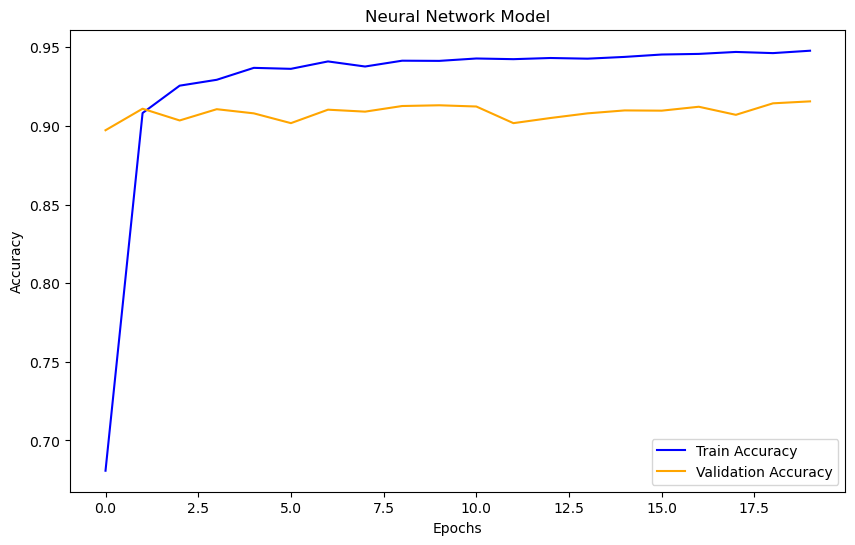

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Training Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')

# Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Adding labels and title
plt.title('Neural Network Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

Epoch 1/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 52s 63ms/step - accuracy: 0.0708 - loss: 3.3231 - val_accuracy: 0.1172 - val_loss: 3.0783
Epoch 2/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 51s 63ms/step - accuracy: 0.0907 - loss: 3.1839 - val_accuracy: 0.1004 - val_loss: 3.1293
Epoch 3/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 47s 58ms/step - accuracy: 0.1025 - loss: 3.0928 - val_accuracy: 0.1408 - val_loss: 3.0288
Epoch 4/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 48s 60ms/step - accuracy: 0.2091 - loss: 2.5589 - val_accuracy: 0.5151 - val_loss: 1.4342
Epoch 5/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.5258 - loss: 1.3581 - val_accuracy: 0.8226 - val_loss: 0.7582
Epoch 6/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.8244 - loss: 0.6427 - val_accuracy: 0.8929 - val_loss: 0.4236
Epoch 7/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.9048 - loss: 0.3563 - val_accuracy: 0.9087 - val_loss: 0.3535
Epoch 8/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.9260 - loss: 0.2640 - 

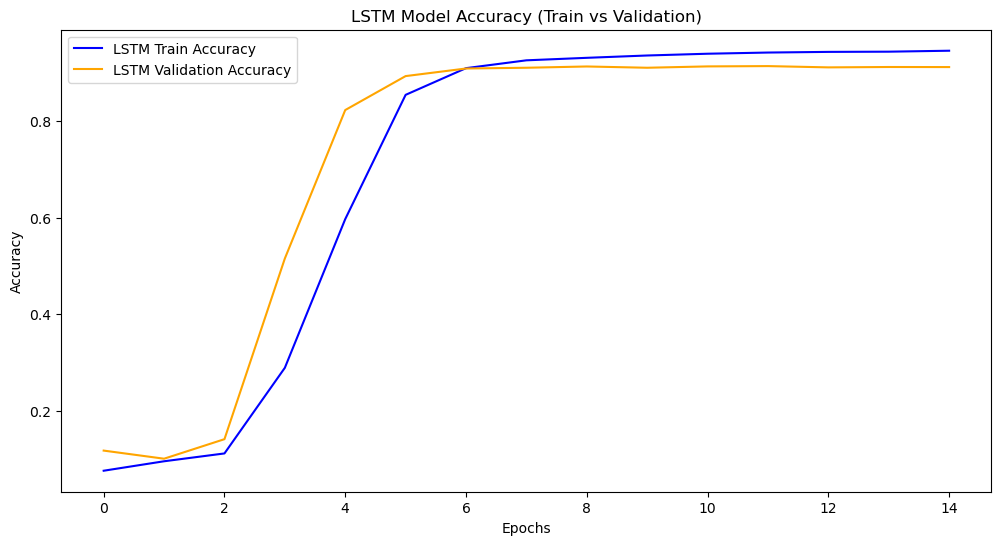

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv('cleaned_encoded_dataset.csv')

# Extract features (X) and labels (y)
X = data['Text'].values
y = data['Language'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ensure text data is string type
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Step 2: Tokenize and pad sequences
vocab_size = 10000  # Limit the vocabulary size
max_length = 150    # Increase max sequence length

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Step 3: Encode labels
num_classes = len(np.unique(y_train))
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

# Step 4: Build the LSTM model
embedding_dim = 128

model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),  # LSTM layer with 128 units and dropout
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Step 5: Compile the model
model_lstm.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 6: Train the model (with 15 epochs)
history_lstm = model_lstm.fit(
    X_train_pad,
    y_train_onehot,
    validation_data=(X_test_pad, y_test_onehot),
    epochs=15,  # Train for 15 epochs
    batch_size=32,
    verbose=1
)

# Step 7: Evaluate the model
test_loss, test_accuracy = model_lstm.evaluate(X_test_pad, y_test_onehot)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Manual accuracy
y_pred = model_lstm.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
manual_accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Manual Test Accuracy: {manual_accuracy:.4f}")

# Step 8: Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# LSTM Training and Validation Accuracy
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy', color='blue')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy', color='orange')

# Adding labels and title
plt.title('LSTM Model Accuracy (Train vs Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


Architecture: GRU_Classifier


Model: "GRU_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.0671 - loss: 3.3268 - val_accuracy: 0.0875 - val_loss: 3.2755
Epoch 2/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.1184 - loss: 3.1396 - val_accuracy: 0.1413 - val_loss: 3.0440
Epoch 3/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.1455 - loss: 3.0124 - val_accuracy: 0.2247 - val_loss: 2.7857
Epoch 4/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.3532 - loss: 2.3670 - val_accuracy: 0.8210 - val_loss: 0.7672
Epoch 5/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.8355 - loss: 0.6692 - val_accuracy: 0.9021 - val_loss: 0.3743
Epoch 6/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.9179 - loss: 0.3503 - val_accuracy: 0.9116 - val_loss: 0.3175
Epoch 7/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.9277 - loss: 0.2818 - val_accuracy: 0.9129 - val_loss: 0.3152
Epoch 8/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.9360 - loss: 0.2322 - 

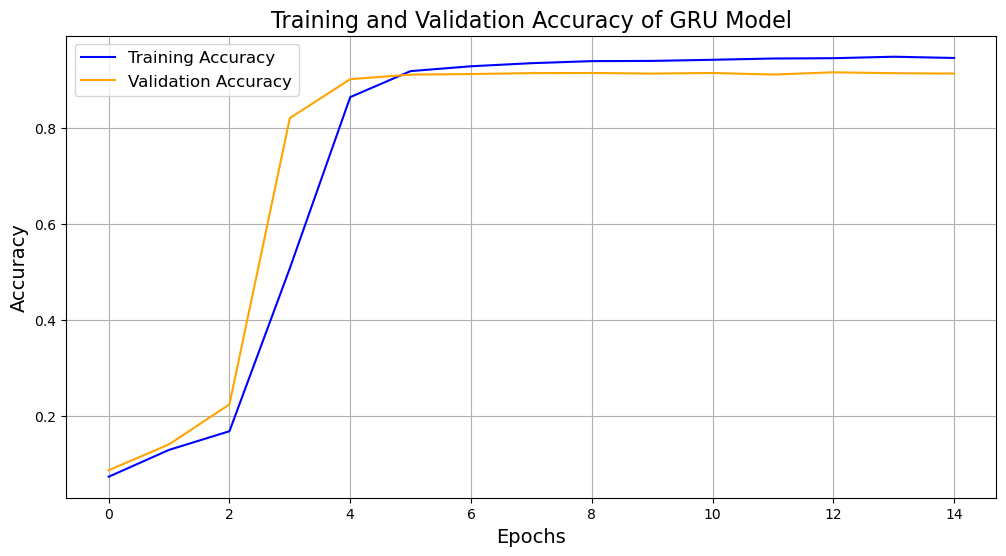

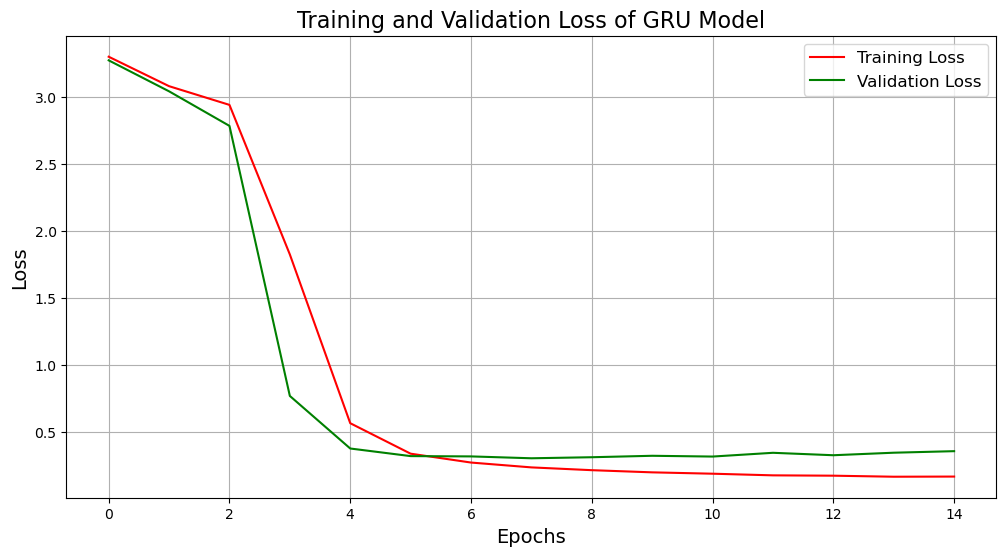

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Define the GRU-based architecture
unique_classes = len(set(y_train))  # Count the unique target classes
gru_model = Sequential(
    name="GRU_Classifier",  # Custom name for the model
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128),  # Word embedding layer
        GRU(units=64, return_sequences=False),  # GRU layer with 64 units
        Dropout(rate=0.5),  # Regularization layer to prevent overfitting
        Dense(units=unique_classes, activation='softmax')  # Output layer for classification
    ]
)

# Display the model structure and name
print(f"Architecture: {gru_model.name}")
gru_model.summary()

# Compile the model with specified parameters
gru_model.compile(
    optimizer='adam',  # Adam optimizer for adaptive learning
    loss='sparse_categorical_crossentropy',  # Loss function for integer labels
    metrics=['accuracy']  # Evaluation metric
)

# Train the GRU classifier
training_history = gru_model.fit(
    X_train_pad,  # Input features for training
    y_train,  # Corresponding training labels
    validation_data=(X_test_pad, y_test),  # Data for validation during training
    epochs=15,  # Number of training cycles (increased to 15 as per the request)
    batch_size=32,  # Number of samples per training batch
    verbose=1  # Display training progress
)

# Evaluate performance on the test set
test_loss, test_accuracy = gru_model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Model Test Accuracy: {test_accuracy:.4f}")

# Calculate manual accuracy
y_pred_probabilities = gru_model.predict(X_test_pad)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)  # Convert to class labels

# Compare predictions with ground truth
manual_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Manual Accuracy: {manual_accuracy:.4f}")  

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='blue')

# Validation accuracy
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Titles and labels
plt.title('Training and Validation Accuracy of GRU Model', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

# Training loss
plt.plot(training_history.history['loss'], label='Training Loss', color='red')

# Validation loss
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='green')

# Titles and labels
plt.title('Training and Validation Loss of GRU Model', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - accuracy: 0.4300 - loss: 1.9946 - val_accuracy: 0.9012 - val_loss: 0.3445
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.9061 - loss: 0.3186 - val_accuracy: 0.9146 - val_loss: 0.2924
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.9192 - loss: 0.2448 - val_accuracy: 0.9119 - val_loss: 0.3118
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step - accuracy: 0.9304 - loss: 0.2136 - val_accuracy: 0.9115 - val_loss: 0.3254
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 55s 69ms/step - accuracy: 0.9317 - loss: 0.2054 - val_accuracy: 0.9153 - val_loss: 0.3595
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.9370 - loss: 0.1931 - val_accuracy: 0.9188 - val_loss: 0.3543
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 53s 66ms/step - accuracy: 0.9390 - loss: 0.1891 - val_accuracy: 0.9066 - val_loss: 0.3900
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.9416 - loss: 0.1795 - 

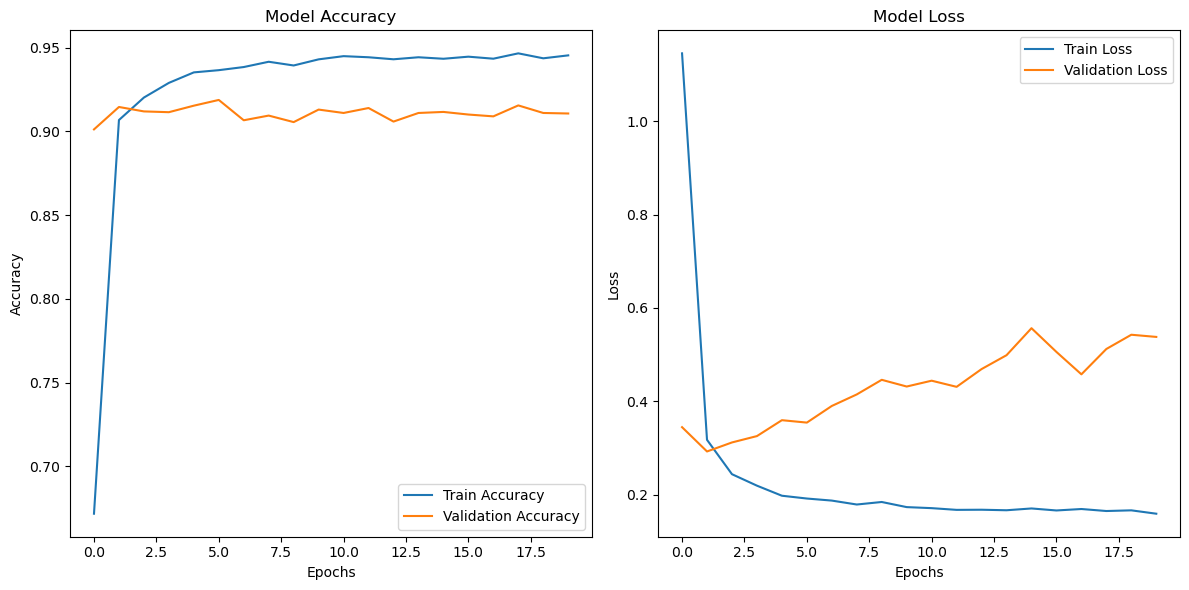

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the dataset
data = pd.read_csv('cleaned_encoded_dataset.csv')

# Extract features (X) and labels (y)
X = data['Text'].values
y = data['Language'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ensure text data is string type
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Step 2: Tokenize and pad sequences
vocab_size = 10000  # Limit the vocabulary size
max_length = 150    # Increase max sequence length

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Step 3: Encode labels
num_classes = len(np.unique(y_train))
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

# Step 4: Build the neural network model
embedding_dim = 128

model_neuralnetwork = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Removed `input_length` argument
    Flatten(),  # Flatten the embedding output for dense layers
    Dense(256, activation='relu'),  # Increased neurons
    Dropout(0.4),  # Added regularization
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Step 5: Compile the model
model_neuralnetwork.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 6: Train the model
history = model_neuralnetwork.fit(
    X_train_pad,
    y_train_onehot,
    validation_data=(X_test_pad, y_test_onehot),
    epochs=20,  # Train for more epochs
    batch_size=32,
    verbose=1
)

# Step 7: Evaluate the model
test_loss, test_accuracy = model_neuralnetwork.evaluate(X_test_pad, y_test_onehot, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Manual accuracy
y_pred = model_neuralnetwork.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
manual_accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Manual Test Accuracy: {manual_accuracy:.4f}")

# Step 8: Plotting the training and validation loss & accuracy
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Save the model
model_neuralnetwork.save('language_classification_model.h5')


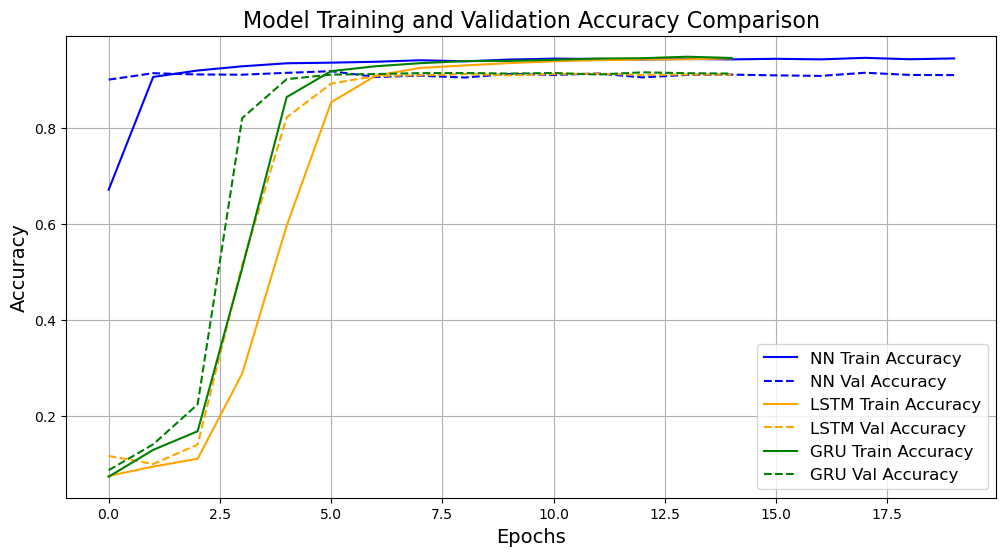

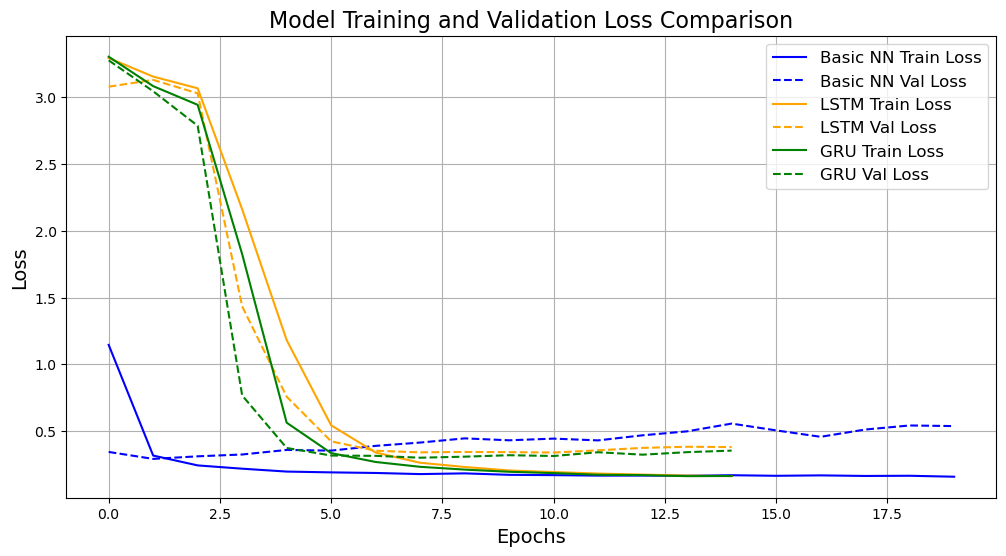

In [17]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy for All Models
plt.figure(figsize=(12, 6))

# Basic Neural Network Accuracy
plt.plot(history.history['accuracy'], label='NN Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='NN Val Accuracy', color='blue', linestyle='dashed')

# LSTM Accuracy
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy', color='orange')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy', color='orange', linestyle='dashed')

# GRU Accuracy
plt.plot(training_history.history['accuracy'], label='GRU Train Accuracy', color='green')
plt.plot(training_history.history['val_accuracy'], label='GRU Val Accuracy', color='green', linestyle='dashed')

# Titles and Labels
plt.title('Model Training and Validation Accuracy Comparison', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

# Plotting Training and Validation Loss for All Models
plt.figure(figsize=(12, 6))

# Basic Neural Network Loss
plt.plot(history.history['loss'], label='Basic NN Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Basic NN Val Loss', color='blue', linestyle='dashed')

# LSTM Loss
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss', color='orange')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss', color='orange', linestyle='dashed')

# GRU Loss
plt.plot(training_history.history['loss'], label='GRU Train Loss', color='green')
plt.plot(training_history.history['val_loss'], label='GRU Val Loss', color='green', linestyle='dashed')

# Titles and Labels
plt.title('Model Training and Validation Loss Comparison', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


In [28]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


Architecture: GRU_Classifier


Model: "GRU_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.0704 - loss: 3.3152 - val_accuracy: 0.2913 - val_loss: 2.3825 - learning_rate: 0.0010
Epoch 2/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.3729 - loss: 1.9956 - val_accuracy: 0.6405 - val_loss: 1.0444 - learning_rate: 0.0010
Epoch 3/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.6824 - loss: 0.9478 - val_accuracy: 0.8120 - val_loss: 0.5880 - learning_rate: 0.0010
Epoch 4/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.8587 - loss: 0.5084 - val_accuracy: 0.8864 - val_loss: 0.4087 - learning_rate: 0.0010
Epoch 5/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.9172 - loss: 0.3205 - val_accuracy: 0.9049 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 6/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.9242 - loss: 0.2758 - val_accuracy: 0.9021 - val_loss: 0.3574 - learning_rate: 0.0010
Epoch 7/15
804/804 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.9348 - l

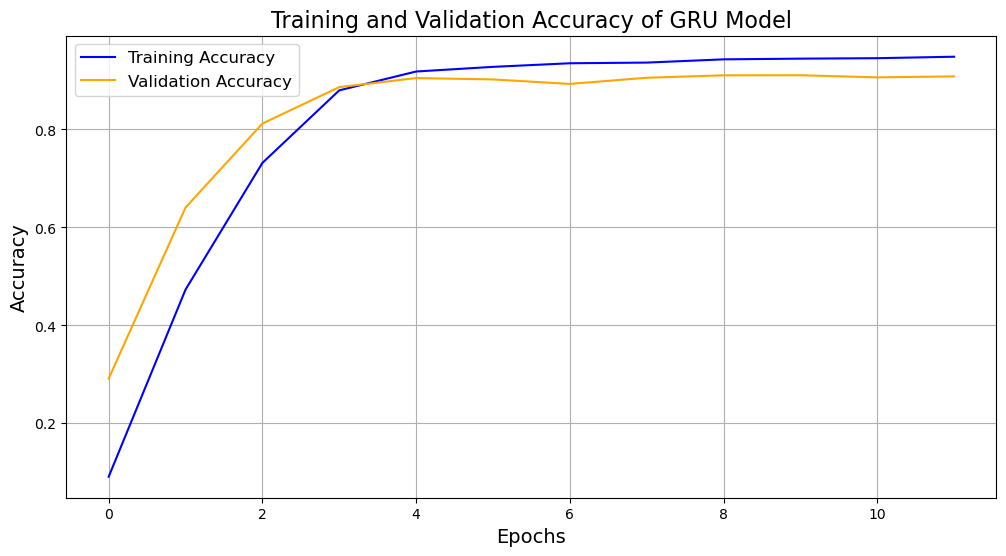

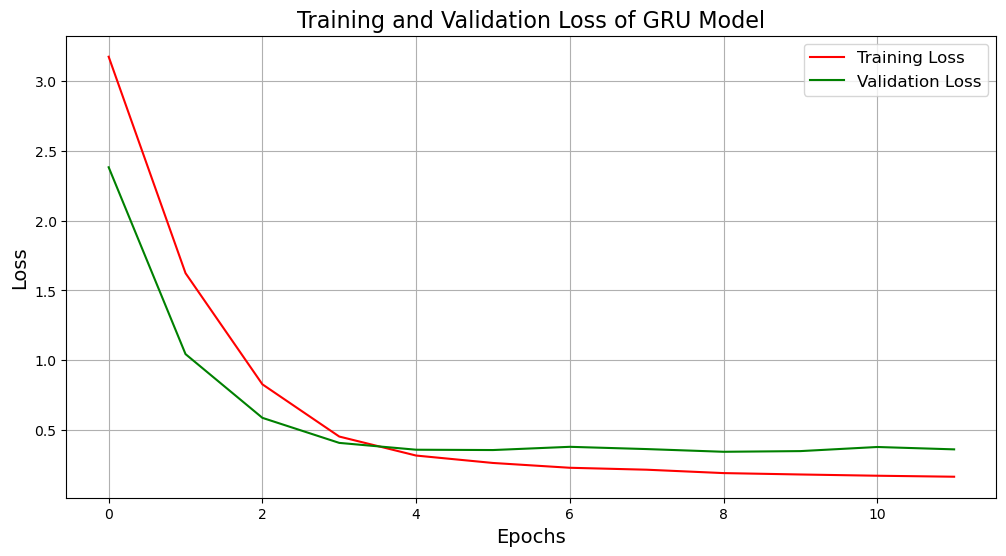

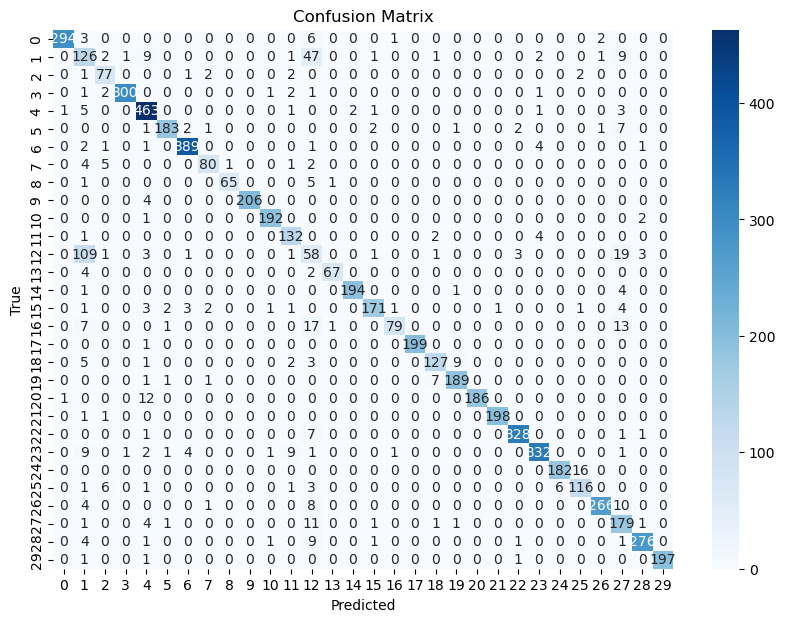

Model saved as 'gru_model.h5'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

# Define the GRU-based architecture
unique_classes = len(set(y_train))  # Count the unique target classes
gru_model = Sequential(
    name="GRU_Classifier",  # Custom name for the model
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128),  # Word embedding layer
        GRU(units=64, return_sequences=False),  # GRU layer with 64 units
        Dropout(rate=0.5),  # Regularization layer to prevent overfitting
        Dense(units=unique_classes, activation='softmax')  # Output layer for classification
    ]
)

# Display the model structure and name
print(f"Architecture: {gru_model.name}")
gru_model.summary()

# Compile the model with specified parameters
gru_model.compile(
    optimizer='adam',  # Adam optimizer for adaptive learning
    loss='sparse_categorical_crossentropy',  # Loss function for integer labels
    metrics=['accuracy']  # Evaluation metric
)

# Early stopping to prevent overfitting and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the GRU classifier
training_history = gru_model.fit(
    X_train_pad,  # Input features for training
    y_train,  # Corresponding training labels
    validation_data=(X_test_pad, y_test),  # Data for validation during training
    epochs=15,  # Number of training cycles
    batch_size=32,  # Number of samples per training batch
    verbose=1,  # Display training progress
    callbacks=[early_stopping, lr_scheduler]  # Early stopping and LR scheduler
)

# Evaluate performance on the test set
test_loss, test_accuracy = gru_model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Model Test Accuracy: {test_accuracy:.4f}")

# Calculate manual accuracy
y_pred_probabilities = gru_model.predict(X_test_pad)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)  # Convert to class labels

# Compare predictions with ground truth
manual_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Manual Accuracy: {manual_accuracy:.4f}")  

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='blue')

# Validation accuracy
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Titles and labels
plt.title('Training and Validation Accuracy of GRU Model', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

# Training loss
plt.plot(training_history.history['loss'], label='Training Loss', color='red')

# Validation loss
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='green')

# Titles and labels
plt.title('Training and Validation Loss of GRU Model', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the model
gru_model.save('gru-model.h5')
print("Model saved as 'gru_model.h5'")

# Perform Cross-Validation (Stratified K-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kf.split(X_train_pad, y_train):
    X_train_cv, X_val_cv = X_train_pad[train_idx], X_train_pad[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

    model = gru_model  # Re-create the model each time
    model.fit(X_train_cv, y_train_cv, validation_data=(X_val_cv, y_val_cv), epochs=15, batch_size=32, verbose=0)
    val_accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]  # Get validation accuracy
    cv_scores.append(val_accuracy)

# Print Cross-Validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")




In [7]:
# Check if X_train and y_train have the same number of samples
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Check the shape of padded sequences after tokenization and padding
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"X_test_pad shape: {X_test_pad.shape}")

# If X_train_pad has a mismatch or is incorrectly shaped, recheck how you padded and tokenized the data:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the input data using the previously loaded tokenizer
X_train_pad = tokenizer.texts_to_sequences(X_train)
X_test_pad = tokenizer.texts_to_sequences(X_test)

# Ensure padding is applied to make all sequences have the same length
X_train_pad = pad_sequences(X_train_pad, padding='post')
X_test_pad = pad_sequences(X_test_pad, padding='post')

# Check the shape again
print(f"After padding, X_train_pad shape: {X_train_pad.shape}")
print(f"After padding, X_test_pad shape: {X_test_pad.shape}")


X_train shape: (25700, 1)
y_train shape: (25700,)
X_train_pad shape: (1, 1)
X_test_pad shape: (1, 1)
After padding, X_train_pad shape: (1, 1)
After padding, X_test_pad shape: (1, 1)


In [10]:
# Check if your data really contains text for language classification
print(X_train.head())
print(X_test.head())



8483     26
4740     14
28234    22
10511     0
4291     14
Name: Language, dtype: object
28510     2
21883     4
31670     7
6835      5
10305    19
Name: Language, dtype: object
